# **Lab 3 - Regression with PyTorch**

### **Building a Single Layer Perceptron**

In [1]:
# importing the required libraries
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch.nn as nn 
from torch.autograd import grad
plt.style.use('dark_background')
# importing the make_classification function
from sklearn.datasets import make_classification

In [2]:
# manual_seed() to initialize the random number generator
torch.manual_seed(123)

In [3]:
## Making a toy dataset
# creating a classification data set using the make_classification function
X,y=make_classification(n_samples=1000,n_features=4 ,n_classes=2)

### Change it into the Tensor
X=torch.tensor(X,dtype=torch.float32)
y=torch.tensor(y,dtype=torch.float32)

In [4]:
X

tensor([[ 1.3432,  0.6048, -0.4747, -0.3470],
        [ 0.6902, -0.8264,  0.3637, -1.2862],
        [-0.9244, -0.9244,  0.5982, -0.2563],
        ...,
        [ 1.2929,  0.6650, -0.5012, -0.2533],
        [ 1.6800, -1.9853,  0.8712, -3.1051],
        [-1.3320, -1.1908,  0.7865, -0.2318]])

In [5]:
y

tensor([1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
        1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1.,
        1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
        0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1.,
        0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1.,
        1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1.,
        0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
        1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
        1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
        1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0.,
        1., 1., 0., 0., 0., 1., 0., 0., 

In [6]:
### Data Suffling
torch.manual_seed(10)
# randperm returns the vector of random permutation of the long integers
suffle_idx=torch.randperm(y.size(0),dtype=torch.long)
X,y=X[suffle_idx],y[suffle_idx]
suffle_idx[:10]

tensor([937, 859, 548, 487, 148, 190, 199, 632,  33, 714])

In [7]:
# splitting dataset
train_size=int(suffle_idx.size(0)*0.7)
train_idx= suffle_idx[:train_size]
test_idx=suffle_idx[train_size:]
X_train,y_train=X[train_idx],y[train_idx]
X_test,y_test=X[test_idx],y[test_idx]

In [8]:
X_train.shape

torch.Size([700, 4])

In [9]:
X_test.shape

torch.Size([300, 4])

In [10]:
y_train.shape

torch.Size([700])

In [11]:
y_test.shape

torch.Size([300])

In [12]:
#### Normalizing the dataset

mean,std_dev=X_train.mean(dim=0) ,X_train.std(dim=0)
X_train=(X_train-mean)/std_dev
X_test=(X_test-mean)/std_dev

In [13]:
# definning the class NN
class NN():
  def __init__(self,n_features):
    self.n_features=n_features
    self.weight=torch.zeros(size=(n_features,1),dtype=torch.float,requires_grad=True)
    self.bias=torch.zeros(1,dtype=torch.float,requires_grad=True)
  

  def forward(self,x):
    output=torch.add(torch.mm(x,self.weight),self.bias)
    return output.view(-1)

def loss_fn(yhat,y):
  return torch.mean((yhat-y)**2)

In [14]:
def train(model,x,y,n_epoch=10,lr=0.001,seed=23,bsz=50):

  # cost list for storing the cost of the error function 
  cost=[]
  torch.manual_seed(seed)
  for i in range(n_epoch):
    suffle_idx=torch.randperm(y.size(0))
    batches=torch.split(suffle_idx,bsz)

    for idx in batches:

      ###1. Compute the output
      yhat=model.forward(x[idx])

      ###2. Compute the Error
      loss=loss_fn(yhat,y[idx])

      ###3. Compute the gradient
      grad_w=grad(loss,model.weight,retain_graph=True)[0]
      grad_b=grad(loss,model.bias)[0]

      ###4. Update Model Parameters
      model.weight=model.weight-lr*grad_w
      model.bias=model.bias-lr*grad_b

    ###5. Log and print the loss
    with torch.no_grad():
      yhat=model.forward(x)
      curr_loss=loss_fn(yhat,y)
      print('Epoc: %3d ' % (i+1),end="")
      print('| MSE % .5f' % curr_loss)
      cost.append(curr_loss)
      
  return cost

In [15]:
model=NN(X_train.size(1))
cost=train(model,X_train,y_train,n_epoch=70)

Epoc:   1 | MSE  0.46239
Epoc:   2 | MSE  0.43004
Epoc:   3 | MSE  0.40104
Epoc:   4 | MSE  0.37498
Epoc:   5 | MSE  0.35153
Epoc:   6 | MSE  0.33035
Epoc:   7 | MSE  0.31117
Epoc:   8 | MSE  0.29375
Epoc:   9 | MSE  0.27793
Epoc:  10 | MSE  0.26351
Epoc:  11 | MSE  0.25032
Epoc:  12 | MSE  0.23826
Epoc:  13 | MSE  0.22719
Epoc:  14 | MSE  0.21703
Epoc:  15 | MSE  0.20766
Epoc:  16 | MSE  0.19902
Epoc:  17 | MSE  0.19104
Epoc:  18 | MSE  0.18365
Epoc:  19 | MSE  0.17680
Epoc:  20 | MSE  0.17043
Epoc:  21 | MSE  0.16452
Epoc:  22 | MSE  0.15901
Epoc:  23 | MSE  0.15388
Epoc:  24 | MSE  0.14910
Epoc:  25 | MSE  0.14463
Epoc:  26 | MSE  0.14045
Epoc:  27 | MSE  0.13654
Epoc:  28 | MSE  0.13288
Epoc:  29 | MSE  0.12945
Epoc:  30 | MSE  0.12624
Epoc:  31 | MSE  0.12322
Epoc:  32 | MSE  0.12039
Epoc:  33 | MSE  0.11773
Epoc:  34 | MSE  0.11524
Epoc:  35 | MSE  0.11289
Epoc:  36 | MSE  0.11068
Epoc:  37 | MSE  0.10860
Epoc:  38 | MSE  0.10664
Epoc:  39 | MSE  0.10480
Epoc:  40 | MSE  0.10306


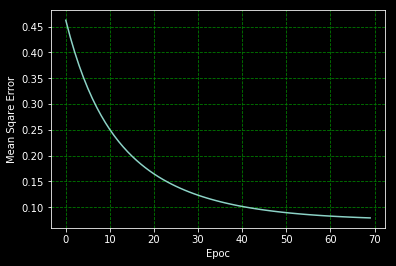

In [16]:
plt.plot(range(len(cost)),cost)
plt.ylabel('Mean Sqare Error')
plt.xlabel('Epoc')
plt.grid(linestyle='--',color='green')
plt.show()

In [17]:
ones=torch.ones(y_train.size())
zero=torch.zeros(y_train.size())
train_pred=model.forward(X_train)
train_acc=torch.mean((  
    torch.where(train_pred > 0.5,
                ones,zero).int()==y_train).float())


ones=torch.ones(y_test.size())
zeros=torch.zeros(y_test.size())
test_pred=model.forward(X_test)
test_acc=torch.mean((torch.where(test_pred> 0.5,ones,zeros).int()==y_test).float())

print('Training Accuracy: %.2f' % (train_acc*100))
print('Testing Accuracy: %.2f' % (test_acc*100))

Training Accuracy: 93.71
Testing Accuracy: 89.33


### **Altering the Learning rate**

In [18]:
# when learning rate is too small
model2=NN(X_train.size(1))
cost2=train(model2,X_train,y_train,lr = 0.000001,n_epoch=70)

Epoc:   1 | MSE  0.49853
Epoc:   2 | MSE  0.49850
Epoc:   3 | MSE  0.49846
Epoc:   4 | MSE  0.49842
Epoc:   5 | MSE  0.49838
Epoc:   6 | MSE  0.49834
Epoc:   7 | MSE  0.49830
Epoc:   8 | MSE  0.49827
Epoc:   9 | MSE  0.49823
Epoc:  10 | MSE  0.49819
Epoc:  11 | MSE  0.49815
Epoc:  12 | MSE  0.49811
Epoc:  13 | MSE  0.49808
Epoc:  14 | MSE  0.49804
Epoc:  15 | MSE  0.49800
Epoc:  16 | MSE  0.49796
Epoc:  17 | MSE  0.49792
Epoc:  18 | MSE  0.49788
Epoc:  19 | MSE  0.49785
Epoc:  20 | MSE  0.49781
Epoc:  21 | MSE  0.49777
Epoc:  22 | MSE  0.49773
Epoc:  23 | MSE  0.49769
Epoc:  24 | MSE  0.49766
Epoc:  25 | MSE  0.49762
Epoc:  26 | MSE  0.49758
Epoc:  27 | MSE  0.49754
Epoc:  28 | MSE  0.49750
Epoc:  29 | MSE  0.49747
Epoc:  30 | MSE  0.49743
Epoc:  31 | MSE  0.49739
Epoc:  32 | MSE  0.49735
Epoc:  33 | MSE  0.49731
Epoc:  34 | MSE  0.49728
Epoc:  35 | MSE  0.49724
Epoc:  36 | MSE  0.49720
Epoc:  37 | MSE  0.49716
Epoc:  38 | MSE  0.49712
Epoc:  39 | MSE  0.49709
Epoc:  40 | MSE  0.49705


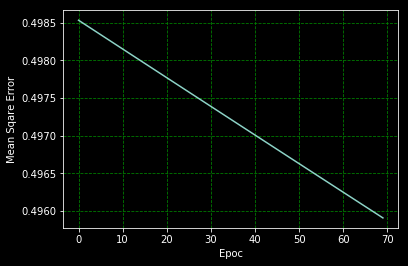

In [19]:
plt.plot(range(len(cost2)),cost2)
plt.ylabel('Mean Sqare Error')
plt.xlabel('Epoc')
plt.grid(linestyle='--',color='green')
plt.show()

We do not reach the the global or local minimum of our cost function 

In [20]:
ones=torch.ones(y_train.size())
zero=torch.zeros(y_train.size())
train_pred=model2.forward(X_train)
train_acc=torch.mean((  
    torch.where(train_pred > 0.5,
                ones,zero).int()==y_train).float())


ones=torch.ones(y_test.size())
zeros=torch.zeros(y_test.size())
test_pred=model2.forward(X_test)
test_acc=torch.mean((torch.where(test_pred> 0.5,ones,zeros).int()==y_test).float())

print('Training Accuracy: %.2f' % (train_acc*100))
print('Testing Accuracy: %.2f' % (test_acc*100))

Training Accuracy: 50.14
Testing Accuracy: 50.33


In [21]:
# when learning rate is too large
model3 = NN(X_train.size(1))
cost3=train(model3,X_train,y_train,lr = 0.1,n_epoch=70)

Epoc:   1 | MSE  0.07482
Epoc:   2 | MSE  0.07428
Epoc:   3 | MSE  0.07416
Epoc:   4 | MSE  0.07409
Epoc:   5 | MSE  0.07622
Epoc:   6 | MSE  0.07421
Epoc:   7 | MSE  0.07492
Epoc:   8 | MSE  0.07429
Epoc:   9 | MSE  0.07475
Epoc:  10 | MSE  0.07423
Epoc:  11 | MSE  0.07409
Epoc:  12 | MSE  0.07437
Epoc:  13 | MSE  0.07437
Epoc:  14 | MSE  0.07448
Epoc:  15 | MSE  0.07439
Epoc:  16 | MSE  0.07418
Epoc:  17 | MSE  0.07404
Epoc:  18 | MSE  0.07424
Epoc:  19 | MSE  0.07443
Epoc:  20 | MSE  0.07484
Epoc:  21 | MSE  0.07482
Epoc:  22 | MSE  0.07433
Epoc:  23 | MSE  0.07471
Epoc:  24 | MSE  0.07440
Epoc:  25 | MSE  0.07427
Epoc:  26 | MSE  0.07462
Epoc:  27 | MSE  0.07442
Epoc:  28 | MSE  0.07464
Epoc:  29 | MSE  0.07428
Epoc:  30 | MSE  0.07462
Epoc:  31 | MSE  0.07415
Epoc:  32 | MSE  0.07415
Epoc:  33 | MSE  0.07429
Epoc:  34 | MSE  0.07443
Epoc:  35 | MSE  0.07427
Epoc:  36 | MSE  0.07541
Epoc:  37 | MSE  0.07437
Epoc:  38 | MSE  0.07411
Epoc:  39 | MSE  0.07526
Epoc:  40 | MSE  0.07534


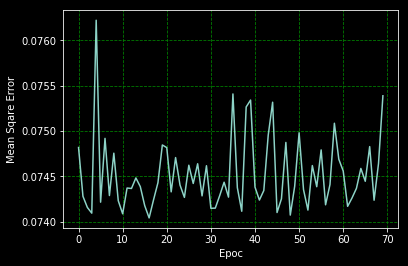

In [22]:
plt.plot(range(len(cost3)),cost3)
plt.ylabel('Mean Sqare Error')
plt.xlabel('Epoc')
plt.grid(linestyle='--',color='green')
plt.show()

When the learning rate is too high, we do not reach the global/local minimum of the cost function because the weight either gets updated too high or too low and that's the reason the graph of cost vs epoch is too much distorted.

In [23]:
ones=torch.ones(y_train.size())
zero=torch.zeros(y_train.size())
train_pred=model3.forward(X_train)
train_acc=torch.mean((  
    torch.where(train_pred > 0.5,
                ones,zero).int()==y_train).float())


ones=torch.ones(y_test.size())
zeros=torch.zeros(y_test.size())
test_pred=model3.forward(X_test)
test_acc=torch.mean((torch.where(test_pred> 0.5,ones,zeros).int()==y_test).float())

print('Training Accuracy: %.2f' % (train_acc*100))
print('Testing Accuracy: %.2f' % (test_acc*100))

Training Accuracy: 94.29
Testing Accuracy: 91.67


### **Altering the batch size**

In [24]:
# when batch size is too small
model4 = NN(X_train.size(1))
cost4=train(model4,X_train,y_train,lr = 0.001,n_epoch=70,bsz=5)

Epoc:   1 | MSE  0.26327
Epoc:   2 | MSE  0.17020
Epoc:   3 | MSE  0.12601
Epoc:   4 | MSE  0.10297
Epoc:   5 | MSE  0.09042
Epoc:   6 | MSE  0.08325
Epoc:   7 | MSE  0.07926
Epoc:   8 | MSE  0.07699
Epoc:   9 | MSE  0.07572
Epoc:  10 | MSE  0.07500
Epoc:  11 | MSE  0.07457
Epoc:  12 | MSE  0.07433
Epoc:  13 | MSE  0.07419
Epoc:  14 | MSE  0.07412
Epoc:  15 | MSE  0.07407
Epoc:  16 | MSE  0.07404
Epoc:  17 | MSE  0.07403
Epoc:  18 | MSE  0.07402
Epoc:  19 | MSE  0.07401
Epoc:  20 | MSE  0.07401
Epoc:  21 | MSE  0.07401
Epoc:  22 | MSE  0.07401
Epoc:  23 | MSE  0.07401
Epoc:  24 | MSE  0.07401
Epoc:  25 | MSE  0.07401
Epoc:  26 | MSE  0.07401
Epoc:  27 | MSE  0.07401
Epoc:  28 | MSE  0.07401
Epoc:  29 | MSE  0.07401
Epoc:  30 | MSE  0.07401
Epoc:  31 | MSE  0.07401
Epoc:  32 | MSE  0.07401
Epoc:  33 | MSE  0.07401
Epoc:  34 | MSE  0.07401
Epoc:  35 | MSE  0.07401
Epoc:  36 | MSE  0.07401
Epoc:  37 | MSE  0.07401
Epoc:  38 | MSE  0.07401
Epoc:  39 | MSE  0.07402
Epoc:  40 | MSE  0.07401


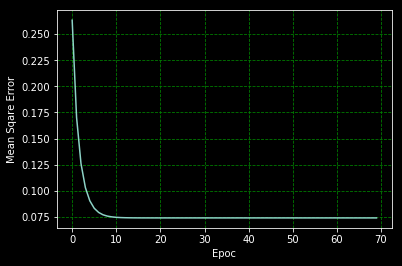

In [25]:
plt.plot(range(len(cost4)),cost4)
plt.ylabel('Mean Sqare Error')
plt.xlabel('Epoc')
plt.grid(linestyle='--',color='green')
plt.show()

When the batch size is too small, the learning process slows down and updation parameters get changed after each small batch size. It may lead to overfitting.

In [26]:
ones=torch.ones(y_train.size())
zero=torch.zeros(y_train.size())
train_pred=model4.forward(X_train)
train_acc=torch.mean((  
    torch.where(train_pred > 0.5,
                ones,zero).int()==y_train).float())


ones=torch.ones(y_test.size())
zeros=torch.zeros(y_test.size())
test_pred=model4.forward(X_test)
test_acc=torch.mean((torch.where(test_pred> 0.5,ones,zeros).int()==y_test).float())

print('Training Accuracy: %.2f' % (train_acc*100))
print('Testing Accuracy: %.2f' % (test_acc*100))

Training Accuracy: 94.00
Testing Accuracy: 93.00


In [27]:
# when the batch size is too large
model5 = NN(X_train.size(1))
cost5=train(model5,X_train,y_train,lr = 0.001,n_epoch=70,bsz=100)

Epoc:   1 | MSE  0.47997
Epoc:   2 | MSE  0.46239
Epoc:   3 | MSE  0.44577
Epoc:   4 | MSE  0.43004
Epoc:   5 | MSE  0.41516
Epoc:   6 | MSE  0.40106
Epoc:   7 | MSE  0.38768
Epoc:   8 | MSE  0.37500
Epoc:   9 | MSE  0.36296
Epoc:  10 | MSE  0.35153
Epoc:  11 | MSE  0.34066
Epoc:  12 | MSE  0.33033
Epoc:  13 | MSE  0.32051
Epoc:  14 | MSE  0.31115
Epoc:  15 | MSE  0.30224
Epoc:  16 | MSE  0.29375
Epoc:  17 | MSE  0.28565
Epoc:  18 | MSE  0.27793
Epoc:  19 | MSE  0.27055
Epoc:  20 | MSE  0.26350
Epoc:  21 | MSE  0.25676
Epoc:  22 | MSE  0.25032
Epoc:  23 | MSE  0.24416
Epoc:  24 | MSE  0.23826
Epoc:  25 | MSE  0.23260
Epoc:  26 | MSE  0.22719
Epoc:  27 | MSE  0.22200
Epoc:  28 | MSE  0.21702
Epoc:  29 | MSE  0.21224
Epoc:  30 | MSE  0.20765
Epoc:  31 | MSE  0.20324
Epoc:  32 | MSE  0.19901
Epoc:  33 | MSE  0.19494
Epoc:  34 | MSE  0.19103
Epoc:  35 | MSE  0.18726
Epoc:  36 | MSE  0.18364
Epoc:  37 | MSE  0.18015
Epoc:  38 | MSE  0.17679
Epoc:  39 | MSE  0.17355
Epoc:  40 | MSE  0.17043


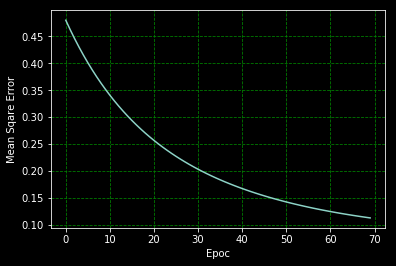

In [28]:
plt.plot(range(len(cost5)),cost5)
plt.ylabel('Mean Sqare Error')
plt.xlabel('Epoc')
plt.grid(linestyle='--',color='green')
plt.show()

When the batch size too large, then training process does not learn much though the process executes faster. The acuracy decreases because the model does not learn from each data point.

In [29]:
ones=torch.ones(y_train.size())
zero=torch.zeros(y_train.size())
train_pred=model5.forward(X_train)
train_acc=torch.mean((  
    torch.where(train_pred > 0.5,
                ones,zero).int()==y_train).float())


ones=torch.ones(y_test.size())
zeros=torch.zeros(y_test.size())
test_pred=model5.forward(X_test)
test_acc=torch.mean((torch.where(test_pred> 0.5,ones,zeros).int()==y_test).float())

print('Training Accuracy: %.2f' % (train_acc*100))
print('Testing Accuracy: %.2f' % (test_acc*100))

Training Accuracy: 84.86
Testing Accuracy: 78.67


### **Altering the number of epoch**

In [30]:
# when the number of epoch is too small 
model6 = NN(X_train.size(1))
cost6=train(model6,X_train,y_train,lr = 0.001,n_epoch=5,bsz=50)

Epoc:   1 | MSE  0.46239
Epoc:   2 | MSE  0.43004
Epoc:   3 | MSE  0.40104
Epoc:   4 | MSE  0.37498
Epoc:   5 | MSE  0.35153


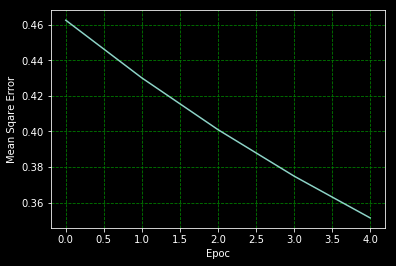

In [31]:
plt.plot(range(len(cost6)),cost6)
plt.ylabel('Mean Sqare Error')
plt.xlabel('Epoc')
plt.grid(linestyle='--',color='green')
plt.show()

When the number of epochs are less, then training process do not learn enough and the error do not reduces much. This leads to less accuracy in the testing data and even in the training dataset 

In [32]:
ones=torch.ones(y_train.size())
zero=torch.zeros(y_train.size())
train_pred=model6.forward(X_train)
train_acc=torch.mean((  
    torch.where(train_pred > 0.5,
                ones,zero).int()==y_train).float())


ones=torch.ones(y_test.size())
zeros=torch.zeros(y_test.size())
test_pred=model6.forward(X_test)
test_acc=torch.mean((torch.where(test_pred> 0.5,ones,zeros).int()==y_test).float())

print('Training Accuracy: %.2f' % (train_acc*100))
print('Testing Accuracy: %.2f' % (test_acc*100))

Training Accuracy: 50.14
Testing Accuracy: 50.33


In [33]:
# when the epochs are high
model7 = NN(X_train.size(1))
cost7=train(model7,X_train,y_train,lr = 0.001,n_epoch=200,bsz=50)

Epoc:   1 | MSE  0.46239
Epoc:   2 | MSE  0.43004
Epoc:   3 | MSE  0.40104
Epoc:   4 | MSE  0.37498
Epoc:   5 | MSE  0.35153
Epoc:   6 | MSE  0.33035
Epoc:   7 | MSE  0.31117
Epoc:   8 | MSE  0.29375
Epoc:   9 | MSE  0.27793
Epoc:  10 | MSE  0.26351
Epoc:  11 | MSE  0.25032
Epoc:  12 | MSE  0.23826
Epoc:  13 | MSE  0.22719
Epoc:  14 | MSE  0.21703
Epoc:  15 | MSE  0.20766
Epoc:  16 | MSE  0.19902
Epoc:  17 | MSE  0.19104
Epoc:  18 | MSE  0.18365
Epoc:  19 | MSE  0.17680
Epoc:  20 | MSE  0.17043
Epoc:  21 | MSE  0.16452
Epoc:  22 | MSE  0.15901
Epoc:  23 | MSE  0.15388
Epoc:  24 | MSE  0.14910
Epoc:  25 | MSE  0.14463
Epoc:  26 | MSE  0.14045
Epoc:  27 | MSE  0.13654
Epoc:  28 | MSE  0.13288
Epoc:  29 | MSE  0.12945
Epoc:  30 | MSE  0.12624
Epoc:  31 | MSE  0.12322
Epoc:  32 | MSE  0.12039
Epoc:  33 | MSE  0.11773
Epoc:  34 | MSE  0.11524
Epoc:  35 | MSE  0.11289
Epoc:  36 | MSE  0.11068
Epoc:  37 | MSE  0.10860
Epoc:  38 | MSE  0.10664
Epoc:  39 | MSE  0.10480
Epoc:  40 | MSE  0.10306


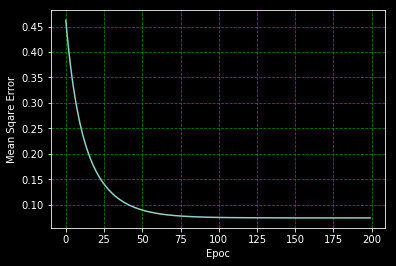

In [34]:
plt.plot(range(len(cost7)),cost7)
plt.ylabel('Mean Sqare Error')
plt.xlabel('Epoc')
plt.grid(linestyle='--',color='green')
plt.show()

When the epoch are high, the model learns well from the training set and accuracy increases. But it may result in overtraining and may lead to overfitting.

In [35]:
ones=torch.ones(y_train.size())
zero=torch.zeros(y_train.size())
train_pred=model7.forward(X_train)
train_acc=torch.mean((  
    torch.where(train_pred > 0.5,
                ones,zero).int()==y_train).float())


ones=torch.ones(y_test.size())
zeros=torch.zeros(y_test.size())
test_pred=model7.forward(X_test)
test_acc=torch.mean((torch.where(test_pred> 0.5,ones,zeros).int()==y_test).float())

print('Training Accuracy: %.2f' % (train_acc*100))
print('Testing Accuracy: %.2f' % (test_acc*100))

Training Accuracy: 94.14
Testing Accuracy: 93.00


### **Using Another Dataset**

In [36]:
# reading the dataset
from random import shuffle
df = pd.read_csv(r'heart_disease.csv')

In [37]:
df = df[:250]

In [38]:
len(df)

250

In [39]:
df.head()

,age,sex,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,slope of peak,number of major vessels,thal,Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 14 columns):
age                                     250 non-null int64
sex                                     250 non-null int64
chest pain type                         250 non-null int64
resting blood pressure                  250 non-null int64
serum cholestoral in mg/dl              250 non-null int64
fasting blood sugar > 120 mg/dl         250 non-null int64
resting electrocardiographic results    250 non-null int64
maximum heart rate achieved             250 non-null int64
exercise induced angina                 250 non-null int64
oldpeak                                 250 non-null float64
slope of peak                           250 non-null int64
number of major vessels                 250 non-null int64
thal                                    250 non-null int64
Disease                                 250 non-null int64
dtypes: float64(1), int64(13)
memory usage: 27.4 KB


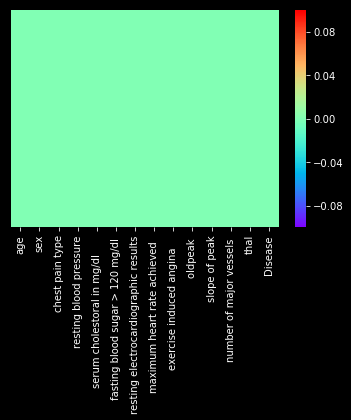

In [41]:
# checking whether the dataset contain any null values or not
sns.heatmap(df.isnull(),yticklabels=False,cmap='rainbow')

In [42]:
# number and name of the columns 
df.columns

Index(['age', 'sex', 'chest pain type', 'resting blood pressure',
       'serum cholestoral in mg/dl      ', 'fasting blood sugar > 120 mg/dl ',
       'resting electrocardiographic results', 'maximum heart rate achieved  ',
       'exercise induced angina    ', 'oldpeak ', 'slope of peak',
       'number of major vessels ', 'thal', 'Disease'],
      dtype='object')

In [43]:
# creating our X
X = df[['age', 'chest pain type', 'maximum heart rate achieved  ','number of major vessels ']].values
X = torch.tensor(X,dtype=torch.float32)
X

tensor([[ 70.,   4., 109.,   3.],
        [ 67.,   3., 160.,   0.],
        [ 57.,   2., 141.,   0.],
        [ 64.,   4., 105.,   1.],
        [ 74.,   2., 121.,   1.],
        [ 65.,   4., 140.,   0.],
        [ 56.,   3., 142.,   1.],
        [ 59.,   4., 142.,   1.],
        [ 60.,   4., 170.,   2.],
        [ 63.,   4., 154.,   3.],
        [ 59.,   4., 161.,   0.],
        [ 53.,   4., 111.,   0.],
        [ 44.,   3., 180.,   0.],
        [ 61.,   1., 145.,   2.],
        [ 57.,   4., 159.,   1.],
        [ 71.,   4., 125.,   0.],
        [ 46.,   4., 120.,   2.],
        [ 53.,   4., 155.,   0.],
        [ 64.,   1., 144.,   0.],
        [ 40.,   1., 178.,   0.],
        [ 67.,   4., 129.,   2.],
        [ 48.,   2., 180.,   0.],
        [ 43.,   4., 181.,   0.],
        [ 47.,   4., 143.,   0.],
        [ 54.,   2., 159.,   1.],
        [ 48.,   3., 139.,   0.],
        [ 46.,   4., 152.,   0.],
        [ 51.,   3., 157.,   0.],
        [ 58.,   3., 165.,   1.],
        [ 71.,

In [44]:
Y = df['Disease'].values
Y = torch.tensor(Y,dtype=torch.float32)
Y

tensor([1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1.,
        1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
        0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
        0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1.,
        1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0.,
        1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
        1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
        0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0.,
        0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
        0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 1., 1., 0., 1., 

In [45]:
# data shuffling
torch.manual_seed(10)

# randperm returns the vector of random permutation of the long integers
sffle_idx = torch.randperm(Y.size(0),dtype=torch.long)
X,Y = X[sffle_idx],Y[sffle_idx]
# printing the shuffle indices
sffle_idx[:10]

tensor([187, 196, 214, 146, 190,  30,  77, 194,  45,  20])

In [46]:
# train test split without using the train test split function of sklearn
train_size = int(sffle_idx.size(0)*0.7)
train_idx = sffle_idx[:train_size]
test_idx = sffle_idx[train_size:]
X_train,Y_train = X[train_idx],Y[train_idx]
X_test,Y_test = X[test_idx],Y[test_idx]

In [47]:
X_train.shape

torch.Size([175, 4])

In [48]:
X_test.shape

torch.Size([75, 4])

In [49]:
Y_train.shape

torch.Size([175])

In [50]:
Y_test.shape

torch.Size([75])

In [51]:
#### Normalizing the dataset

mean,std_dev=X_train.mean(dim=0) ,X_train.std(dim=0)
X_train=(X_train-mean)/std_dev
X_test=(X_test-mean)/std_dev

In [52]:
# definning the class of our neural network
class NN():
  def __init__(self,n_features):
    self.n_features=n_features
    self.weight=torch.zeros(size=(n_features,1),dtype=torch.float,requires_grad=True)
    self.bias=torch.zeros(1,dtype=torch.float,requires_grad=True)
  

  def forward(self,x):
    output=torch.add(torch.mm(x,self.weight),self.bias)
    return output.view(-1)


In [53]:
# definning our loss function
def loss_fn(yhat,y):
  # return torch.mean((yhat-y)**2)
  return torch.mean((yhat-y)**2)

In [54]:
# definning the train function to train our model
def train(model,x,y,n_epoch=10,lr=0.001,seed=23,bsz=5):
    # list to store the cost of error function
    cost = []
    torch.manual_seed(seed)
    for i in range(n_epoch):
        sffle_idx = torch.randperm(y.size(0))
        batches = torch.split(sffle_idx,bsz)

        for idx in batches:
            
            # 1. computing the output
            yhat = model.forward(x[idx])

            # 2. computing the loss
            loss = loss_fn(yhat,y[idx])

            # 3. computing the gradient
            grad_w = grad(loss,model.weight,retain_graph=True)[0] 
            grad_b = grad(loss,model.bias)[0]

            # 4. Update Model Parameters
            model.weight = model.weight - lr*grad_w
            model.bias = model.bias - lr*grad_b

        # 5. log and print the loss
        with torch.no_grad():
            yhat = model.forward(x)
            curr_loss = loss_fn(yhat,y)
            print('Epoc: %3d ' % (i+1),end="")
            print('| MSE % .5f' % curr_loss)
            cost.append(curr_loss)
      
    return cost

In [64]:
model8 = NN(X_train.size(1))
cost8 = train(model8,X_train,Y_train,lr=0.01,n_epoch=100)

Epoc:   1 | MSE  0.22494
Epoc:   2 | MSE  0.17291
Epoc:   3 | MSE  0.16172
Epoc:   4 | MSE  0.15933
Epoc:   5 | MSE  0.15871
Epoc:   6 | MSE  0.15871
Epoc:   7 | MSE  0.15836
Epoc:   8 | MSE  0.15827
Epoc:   9 | MSE  0.15831
Epoc:  10 | MSE  0.15826
Epoc:  11 | MSE  0.15829
Epoc:  12 | MSE  0.15826
Epoc:  13 | MSE  0.15836
Epoc:  14 | MSE  0.15851
Epoc:  15 | MSE  0.15831
Epoc:  16 | MSE  0.15837
Epoc:  17 | MSE  0.15827
Epoc:  18 | MSE  0.15826
Epoc:  19 | MSE  0.15838
Epoc:  20 | MSE  0.15861
Epoc:  21 | MSE  0.15850
Epoc:  22 | MSE  0.15831
Epoc:  23 | MSE  0.15835
Epoc:  24 | MSE  0.15840
Epoc:  25 | MSE  0.15831
Epoc:  26 | MSE  0.15837
Epoc:  27 | MSE  0.15831
Epoc:  28 | MSE  0.15839
Epoc:  29 | MSE  0.15825
Epoc:  30 | MSE  0.15831
Epoc:  31 | MSE  0.15835
Epoc:  32 | MSE  0.15828
Epoc:  33 | MSE  0.15826
Epoc:  34 | MSE  0.15828
Epoc:  35 | MSE  0.15841
Epoc:  36 | MSE  0.15846
Epoc:  37 | MSE  0.15843
Epoc:  38 | MSE  0.15830
Epoc:  39 | MSE  0.15827
Epoc:  40 | MSE  0.15825


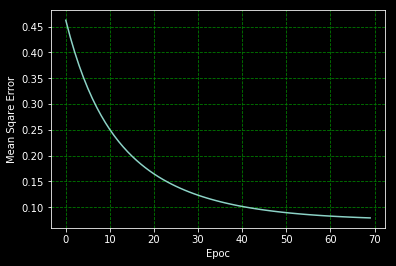

In [65]:
plt.plot(range(len(cost)),cost)
plt.ylabel('Mean Sqare Error')
plt.xlabel('Epoc')
plt.grid(linestyle='--',color='green')
plt.show()

In [66]:
ones=torch.ones(Y_train.size())
zero=torch.zeros(Y_train.size())
train_pred=model8.forward(X_train)
train_acc=torch.mean((  
    torch.where(train_pred > 0.5,
                ones,zero).int()==Y_train).float())


ones=torch.ones(Y_test.size())
zeros=torch.zeros(Y_test.size())
test_pred=model8.forward(X_test)
test_acc=torch.mean((torch.where(test_pred> 0.5,ones,zeros).int()==Y_test).float())

print('Training Accuracy: %.2f' % (train_acc*100))
print('Testing Accuracy: %.2f' % (test_acc*100))

Training Accuracy: 81.71
Testing Accuracy: 77.33
